
Fold 1

Fold 2

Fold 3

Fold 4

Fold 5

=== LAST FOLD DEBUG INFO ===
Test Label Distribution:
IRA
en     286
ms     207
mix     31
Name: count, dtype: int64

Classification Report for Langdetect (Last Fold):
              precision    recall  f1-score   support

          en       0.97      0.72      0.82       286
          ms       0.94      0.82      0.88       207
         mix       0.13      0.45      0.20        31

   micro avg       0.78      0.74      0.76       524
   macro avg       0.68      0.66      0.63       524
weighted avg       0.91      0.74      0.81       524


Raw Confusion Matrix:
[[205   1  60]
 [  1 170  34]
 [  5   9  14]]


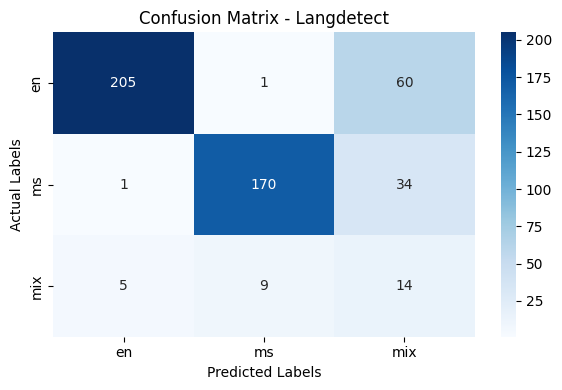


Classification Report for Spacy (Last Fold):
              precision    recall  f1-score   support

          en       0.97      0.59      0.74       286
          ms       0.94      0.65      0.77       207
         mix       0.13      0.58      0.21        31

   micro avg       0.70      0.62      0.66       524
   macro avg       0.68      0.61      0.57       524
weighted avg       0.91      0.62      0.72       524


Raw Confusion Matrix:
[[170   2  67]
 [  2 135  55]
 [  3   7  18]]


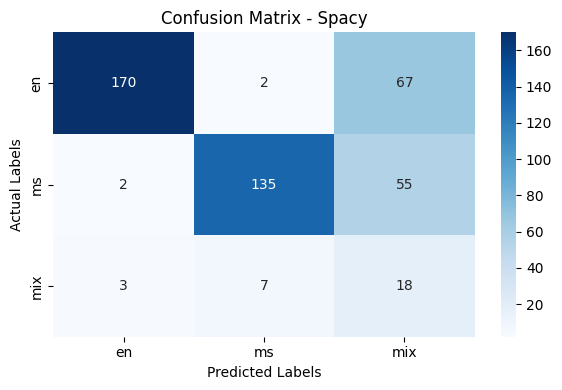


Classification Report for FastText (Last Fold):
              precision    recall  f1-score   support

          en       1.00      0.51      0.67       286
          ms       1.00      0.04      0.08       207
         mix       0.08      1.00      0.15        31

    accuracy                           0.35       524
   macro avg       0.69      0.52      0.30       524
weighted avg       0.95      0.35      0.41       524


Raw Confusion Matrix:
[[145   0 141]
 [  0   9 198]
 [  0   0  31]]


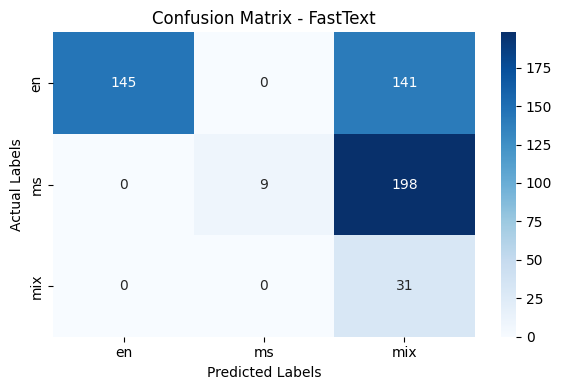


Classification Report for Roberta (Last Fold):
              precision    recall  f1-score   support

          en       0.95      0.89      0.92       286
          ms       0.00      0.00      0.00       207
         mix       0.15      0.58      0.24        31

   micro avg       0.71      0.52      0.60       524
   macro avg       0.37      0.49      0.39       524
weighted avg       0.53      0.52      0.52       524


Raw Confusion Matrix:
[[254   0  24]
 [  7   0  77]
 [  5   0  18]]


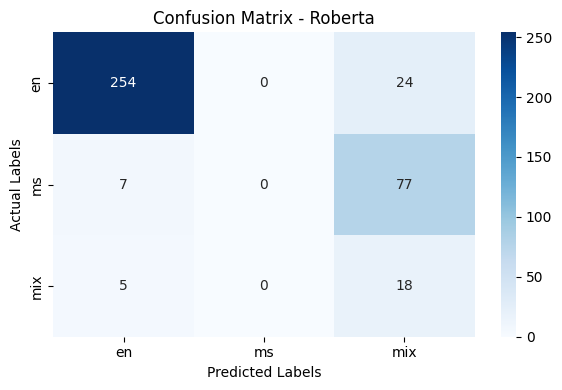


Classification Report for LLaMA (Last Fold):
              precision    recall  f1-score   support

          en       0.99      0.83      0.90       286
          ms       0.92      0.86      0.89       207
         mix       0.16      0.48      0.24        31

    accuracy                           0.82       524
   macro avg       0.69      0.72      0.68       524
weighted avg       0.91      0.82      0.86       524


Raw Confusion Matrix:
[[237   1  48]
 [  0 177  30]
 [  2  14  15]]


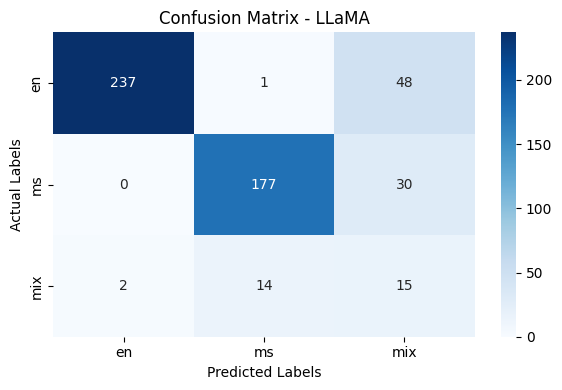


Classification Report for Proposed (Last Fold):
              precision    recall  f1-score   support

          en       0.99      0.86      0.92       286
          ms       0.96      0.87      0.91       207
         mix       0.29      0.81      0.43        31

    accuracy                           0.86       524
   macro avg       0.75      0.85      0.75       524
weighted avg       0.93      0.86      0.89       524


Raw Confusion Matrix:
[[247   4  35]
 [  1 180  26]
 [  2   4  25]]


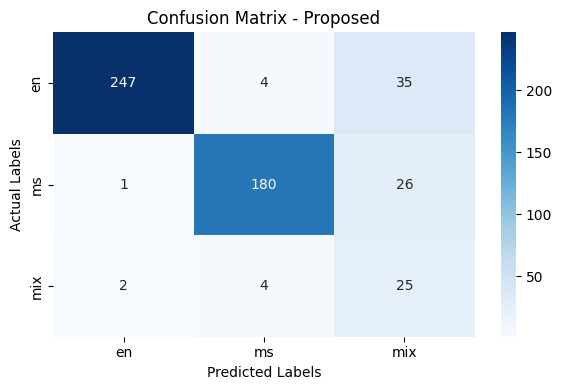


=== Cross-Validation Results ===
Langdetect:
  Precision: 0.129 ± 0.015
  Recall: 0.125 ± 0.017
  F1: 0.127 ± 0.016
  Accuracy: 0.734 ± 0.011

Spacy:
  Precision: 0.090 ± 0.006
  Recall: 0.078 ± 0.009
  F1: 0.084 ± 0.008
  Accuracy: 0.597 ± 0.018

FastText:
  Precision: 0.658 ± 0.071
  Recall: 0.478 ± 0.060
  F1: 0.554 ± 0.065
  Accuracy: 0.342 ± 0.010

Roberta:
  Precision: 0.083 ± 0.003
  Recall: 0.108 ± 0.005
  F1: 0.094 ± 0.003
  Accuracy: 0.520 ± 0.009

LLaMA:
  Precision: 0.695 ± 0.004
  Recall: 0.732 ± 0.012
  F1: 0.713 ± 0.008
  Accuracy: 0.815 ± 0.009

Proposed:
  Precision: 0.727 ± 0.014
  Recall: 0.807 ± 0.030
  F1: 0.765 ± 0.021
  Accuracy: 0.849 ± 0.011


=== Statistical Significance Tests (Paired t-test) ===
Proposed vs Langdetect: t = 58.917, p = 0.000
  The difference is significant (p < 0.05)

Proposed vs Spacy: t = 62.009, p = 0.000
  The difference is significant (p < 0.05)

Proposed vs FastText: t = 6.006, p = 0.004
  The difference is significant (p < 0.05)

Propo

In [5]:
# Individual last fold
import pandas as pd
import os
import openpyxl
import getpass
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold
from scipy.stats import ttest_rel

# Load Excel file
user = getpass.getuser()
file_name = "SubjectAppsDataset_exp031.xlsx"
file_path = file_name

xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="Sheet1")

def clean_labels(series):
    return series.astype(str).str.strip().str.lower().replace('id', 'ms')

cols_to_replace = [
    'Exp_Language_Detection[NLTK]', 'Exp_Language_Detection[Spacy]', 
    'Exp_Language_Detection[FastText]', 'Exp_Language_Detection[Roberta]',
    'llama', 'Exp_Language_Detection[Proposed]'
]
df['IRA'] = clean_labels(df['IRA'])
for col in cols_to_replace:
    df[col] = clean_labels(df[col])

# Extract columns
manual_labels = df['IRA']
Langdetect_predictions = df['Exp_Language_Detection[NLTK]']
spacy_predictions = df['Exp_Language_Detection[Spacy]']
fasttext_predictions = df['Exp_Language_Detection[FastText]']
Roberta_predictions = df['Exp_Language_Detection[Roberta]']
llama_predictions = df['llama']
proposed_predictions = df['Exp_Language_Detection[Proposed]']
labels = ['en', 'ms', 'mix']

# Metric helpers
def compute_confusion_elements(true_labels, predictions, labels):
    cm = confusion_matrix(true_labels, predictions, labels=labels)
    tp = {label: cm[i, i] for i, label in enumerate(labels)}
    fp = {label: cm[:, i].sum() - cm[i, i] for i, label in enumerate(labels)}
    fn = {label: cm[i, :].sum() - cm[i, i] for i, label in enumerate(labels)}
    tn = {label: cm.sum() - (tp[label] + fp[label] + fn[label]) for label in labels}
    return tp, tn, fp, fn

def compute_metrics(true_labels, predictions, labels):
    precision = precision_score(true_labels, predictions, average='macro', zero_division=0)
    recall = recall_score(true_labels, predictions, average='macro', zero_division=0)
    f1 = 2 * ((precision * recall) / (precision + recall)) if (precision + recall) != 0 else 0
    tp, tn, fp, fn = compute_confusion_elements(true_labels, predictions, labels)
    accuracy = accuracy_score(true_labels, predictions)
    return precision, recall, f1, accuracy, tp, tn, fp, fn

# Cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
metrics = {name: {'precision': [], 'recall': [], 'f1': [], 'accuracy': []} 
           for name in ['Langdetect', 'Spacy', 'FastText', 'Roberta', 'LLaMA', 'Proposed']}
last_fold_results = {}

for fold, (train_idx, test_idx) in enumerate(skf.split(df, manual_labels)):
    print(f"\nFold {fold + 1}")
    train_labels = manual_labels.iloc[train_idx]
    test_labels = manual_labels.iloc[test_idx]

    if fold == 4:
        print("\n=== LAST FOLD DEBUG INFO ===")
        print("Test Label Distribution:")
        print(test_labels.value_counts())

    models = {
        'Langdetect': Langdetect_predictions.iloc[test_idx],
        'Spacy': spacy_predictions.iloc[test_idx],
        'FastText': fasttext_predictions.iloc[test_idx],
        'Roberta': Roberta_predictions.iloc[test_idx],
        'LLaMA': llama_predictions.iloc[test_idx],
        'Proposed': proposed_predictions.iloc[test_idx]
    }

    for model_name, predictions in models.items():
        # Clean again for safety
        test_clean = clean_labels(test_labels)
        pred_clean = clean_labels(predictions)

        precision, recall, f1, accuracy, tp, tn, fp, fn = compute_metrics(test_clean, pred_clean, labels)
        metrics[model_name]['precision'].append(precision)
        metrics[model_name]['recall'].append(recall)
        metrics[model_name]['f1'].append(f1)
        metrics[model_name]['accuracy'].append(accuracy)

        if fold == 4:
            last_fold_results[model_name] = {'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn}

            # Classification Report
            print(f"\nClassification Report for {model_name} (Last Fold):")
            print(classification_report(test_clean, pred_clean, labels=labels, target_names=labels, zero_division=0))

            # Confusion Matrix
            cm = confusion_matrix(test_clean, pred_clean, labels=labels)
            print("\nRaw Confusion Matrix:")
            print(cm)

            cm_df = pd.DataFrame(cm, index=labels, columns=labels)
            plt.figure(figsize=(6, 4))
            sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
            plt.title(f'Confusion Matrix - {model_name}')
            plt.ylabel('Actual Labels')
            plt.xlabel('Predicted Labels')
            plt.tight_layout()
            plt.show()

# Summary of Cross-Validation
print("\n=== Cross-Validation Results ===")
for model_name in metrics:
    print(f"{model_name}:")
    for metric_name in ['precision', 'recall', 'f1', 'accuracy']:
        mean_val = np.mean(metrics[model_name][metric_name])
        std_val = np.std(metrics[model_name][metric_name])
        print(f"  {metric_name.capitalize()}: {mean_val:.3f} ± {std_val:.3f}")
    print()

# Statistical significance tests
print("\n=== Statistical Significance Tests (Paired t-test) ===")
proposed_f1 = metrics['Proposed']['f1']
for model_name in metrics:
    if model_name != 'Proposed':
        t_stat, p_value = ttest_rel(proposed_f1, metrics[model_name]['f1'])
        sig = "significant" if p_value < 0.05 else "not significant"
        print(f"Proposed vs {model_name}: t = {t_stat:.3f}, p = {p_value:.3f}")
        print(f"  The difference is {sig} (p {'<' if p_value < 0.05 else '>='} 0.05)\n")

# Confusion matrix data export
data = {}
for model_name, result in last_fold_results.items():
    for label in labels:
        data[(model_name, label)] = [
            result['tp'][label],
            result['tn'][label],
            result['fp'][label],
            result['fn'][label]
        ]

xls.close()
